In [54]:
import pandas as pd
import numpy as np
import pickle

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Data cleaning and preparation

In [55]:
df = pd.read_csv('CreditScoring.csv')

In [56]:
len(df)

4455

In [57]:
df.head().T

,0,1,2,3,4
Status,1,1,2,1,1
Seniority,9,17,10,0,0
Home,1,1,2,1,1
Time,60,60,36,60,36
Age,30,58,46,24,26
Marital,2,3,2,1,1
Records,1,1,2,1,1
Job,3,1,3,1,1
Expenses,73,48,90,63,46
Income,129,131,200,182,107


In [58]:
df.dtypes

Status       int64
Seniority    int64
Home         int64
Time         int64
Age          int64
Marital      int64
Records      int64
Job          int64
Expenses     int64
Income       int64
Assets       int64
Debt         int64
Amount       int64
Price        int64
dtype: object

In [59]:
df.isnull().sum()

Status       0
Seniority    0
Home         0
Time         0
Age          0
Marital      0
Records      0
Job          0
Expenses     0
Income       0
Assets       0
Debt         0
Amount       0
Price        0
dtype: int64

In [60]:
df.isna().sum()

Status       0
Seniority    0
Home         0
Time         0
Age          0
Marital      0
Records      0
Job          0
Expenses     0
Income       0
Assets       0
Debt         0
Amount       0
Price        0
dtype: int64

In [61]:
df.columns = df.columns.str.lower()

In [64]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df['status'] = df['status'].map(status_values)

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [65]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,NaN,9,NaN,60,30,NaN,NaN,NaN,73,129,0,0,800,846
1,NaN,17,NaN,60,58,NaN,NaN,NaN,48,131,0,0,1000,1658
2,NaN,10,NaN,36,46,NaN,NaN,NaN,90,200,3000,0,2000,2985
3,NaN,0,NaN,60,24,NaN,NaN,NaN,63,182,2500,0,900,1325
4,NaN,0,NaN,36,26,NaN,NaN,NaN,46,107,0,0,310,910


In [66]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [67]:
for col in ['income', 'assets', 'debt']:
    df[col] = df[col].replace(99999999.0, np.nan)

In [68]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [69]:
df.isna().sum()

status       4455
seniority       0
home         4455
time            0
age             0
marital      4455
records      4455
job          4455
expenses        0
income         34
assets         47
debt           18
amount          0
price           0
dtype: int64

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
df_train_val, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_train_val, test_size=0.33, random_state=11)

In [ ]:
y_train = (df_train['status'] == 'default').astype(int).values
y_val = (df_val['status'] == 'default').astype(int).values
y_test = (df_test['status'] == 'default').astype(int).values

del df_train['status']
del df_val['status']
del df_test['status']

Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve
from sklearn.tree import export_text

In [73]:
dv = DictVectorizer(sparse=False)

In [74]:
train_dict = df_train.fillna(0).to_dict(orient='records')
val_dict = df_val.fillna(0).to_dict(orient='records')
x_train = dv.fit_transform(train_dict)
x_val = dv.transform(val_dict)

In [75]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [76]:
y_pred = clf.predict(x_val)
accuracy_score(y_val, y_pred)

0.6822429906542056

In [77]:
y_pred_proba = clf.predict_proba(x_val)[:, 1]
print("Train: ", roc_auc_score(y_train, clf.predict_proba(x_train)[:, 1]))
print("Val: ", roc_auc_score(y_val, y_pred_proba))

Train:  1.0
Val:  0.5938918776596502


In [78]:
clf = DecisionTreeClassifier(max_depth = 2)

In [79]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [80]:
y_pred_proba = clf.predict_proba(x_val)[:, 1]
print("Train: ", roc_auc_score(y_train, clf.predict_proba(x_train)[:, 1]))
print("Val: ", roc_auc_score(y_val, y_pred_proba))

Train:  0.7092285320273687
Val:  0.6791394475043764


In [81]:
print(export_text(clf, feature_names = dv.get_feature_names_out()))

|--- seniority <= 2.50
|   |--- income <= 88.50
|   |   |--- class: 1
|   |--- income >  88.50
|   |   |--- class: 0
|--- seniority >  2.50
|   |--- income <= 99.50
|   |   |--- class: 0
|   |--- income >  99.50
|   |   |--- class: 0



Tunning

In [82]:
depths = [2,3,4,5,6]
min_leafs = [1,3,5,10,15,20,50,100,150,200]
score = []

for depth in depths:
    for m_leaf in min_leafs:
        clf = DecisionTreeClassifier(max_depth = depth, min_samples_leaf =  m_leaf)
        clf.fit(x_train, y_train)
        y_pred_proba = clf.predict_proba(x_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred_proba)
        score.append((depth, m_leaf, auc))

In [83]:
cols = ["max_depth", "min_leaf", "auc"]
df_scores = pd.DataFrame(score, columns = cols)

In [84]:
df_scores

,max_depth,min_leaf,auc
0,2,1,0.679139
1,2,3,0.679139
2,2,5,0.679139
3,2,10,0.679139
4,2,15,0.679139
5,2,20,0.679139
6,2,50,0.679139
7,2,100,0.679139
8,2,150,0.679139
9,2,200,0.679139


In [85]:
df_scores_pv = df_scores.pivot(index="min_leaf", columns = ["max_depth"], values = "auc")
df_scores_pv

max_depth,2,3,4,5,6
min_leaf,,,,,
1,0.679139,0.708550,0.717342,0.717527,0.675053
3,0.679139,0.708550,0.717342,0.717527,0.686795
5,0.679139,0.708550,0.717342,0.717527,0.703162
10,0.679139,0.708550,0.717342,0.707499,0.710778
15,0.679139,0.708550,0.715021,0.713681,0.711632
20,0.679139,0.708550,0.721210,0.730374,0.736205
50,0.679139,0.708097,0.730646,0.733058,0.734111
100,0.679139,0.708097,0.727534,0.727369,0.728691
150,0.679139,0.706755,0.721847,0.726084,0.726076


In [86]:
df_scores.loc[df_scores['auc'] == df_scores['auc'].max()]

,max_depth,min_leaf,auc
45,6,20,0.736205


<Axes: xlabel='max_depth', ylabel='min_leaf'>

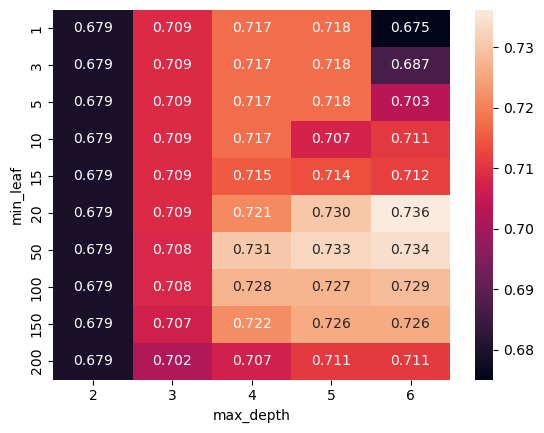

In [87]:
sns.heatmap(df_scores_pv, annot=True, fmt=".3f")

In [88]:
clf = DecisionTreeClassifier(max_depth = 6, min_samples_leaf =  50)
clf.fit(x_train, y_train)
model_name = 'DT.bin'

with open('models/'+model_name, 'wb') as f_out:
    pickle.dump((dv, clf), f_out)

Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
score = []

for depth in [5, 10, 15]:
    for n_estim in range(10, 201, 10):
        clf = RandomForestClassifier(n_estimators = n_estim, max_depth = depth, random_state = 1)
        clf.fit(x_train, y_train)
        y_pred_proba = clf.predict_proba(x_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred_proba)
        score.append((depth, n_estim, auc))

In [91]:
cols = ["max_depth", "n_estim", "auc"]
df_scores = pd.DataFrame(score, columns = cols)

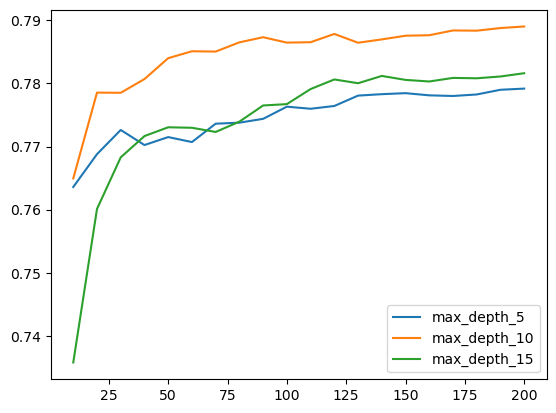

In [92]:
for depth in [5, 10, 15]:
    df_sub = df_scores[df_scores['max_depth']==depth]
    plt.plot(df_sub['n_estim'], df_sub['auc'],label=f'max_depth_{depth}')
plt.legend()
plt.show()

In [93]:
score = []
depth = 10

for min_leaf in [5, 10, 50, 100]:
    for n_estim in range(10, 201, 10):
        clf = RandomForestClassifier(n_estimators = n_estim, max_depth = depth, min_samples_leaf = min_leaf, random_state = 1)
        clf.fit(x_train, y_train)
        y_pred_proba = clf.predict_proba(x_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred_proba)
        score.append((min_leaf, n_estim, auc))

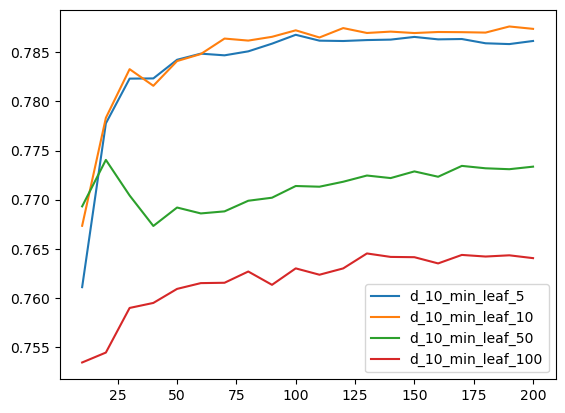

In [94]:
cols = ["min_leaf", "n_estim", "auc"]
df_scores = pd.DataFrame(score, columns = cols)
for min_leaf in [5, 10, 50, 100]:
    df_sub = df_scores[df_scores['min_leaf']==min_leaf]
    plt.plot(df_sub['n_estim'], df_sub['auc'],label=f'd_{depth}_min_leaf_{min_leaf}')
plt.legend()
plt.show()

In [95]:
clf = RandomForestClassifier(n_estimators = 110, max_depth = 10, min_samples_leaf = 5, random_state = 1)
clf.fit(x_train, y_train)
model_name = 'RF.bin'

with open('models/'+model_name, 'wb') as f_out:
    pickle.dump((dv, clf), f_out)

XGBoost

In [96]:
import xgboost as xgb

In [97]:
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(x_train,label=y_train, feature_names=features)
dval = xgb.DMatrix(x_val,label=y_val, feature_names=features)

In [98]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.7600444045941677

In [99]:
watch_list= [(dtrain, "train"), (dval, "val")]

In [100]:
%%capture output
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watch_list)

In [101]:
s = output.stdout

In [102]:
s[:50]

'[0]\ttrain-auc:0.83359\tval-auc:0.70948\n[5]\ttrain-au'

In [103]:
print(s[-100:])

000	val-auc:0.75184
[195]	train-auc:1.00000	val-auc:0.75047
[199]	train-auc:1.00000	val-auc:0.75137



In [104]:
def parse_output_xgb(output):
    res = []
    for line in output.stdout.split('\n'):
        if line != '':
            ite, train, val = line.split('\t')
            ite = int(ite.strip('[]'))
            train = float(train.split(':')[1])
            val = float(val.split(':')[1])
            res.append((ite,train,val))

    col = ["iteration", "train", "val"]
    df = pd.DataFrame(res, columns=col)
    return df
        

In [105]:
df_xgb = parse_output_xgb(output)

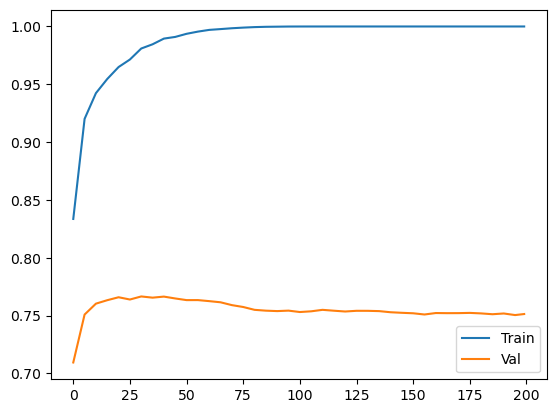

In [106]:
plt.plot(df_xgb['iteration'].values, df_xgb['train'].values,label='Train')
plt.plot(df_xgb['iteration'].values, df_xgb['val'].values,label='Val')
plt.legend()
plt.show()

In [107]:
model = xgb.train(xgb_params, dtrain, num_boost_round=200)
model_name = 'XGB.bin'

with open('models/'+model_name, 'wb') as f_out:
    pickle.dump((dv, model), f_out)